In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Spotify%20top%2050%20songs%20in%202021/spotify_top50_2021.csv")
df.head()

,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.137,143.875,242013,4
1,2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,137704,4
2,3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806,4
3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147,4
4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50 non-null     int64  
 1   artist_name       50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   popularity        50 non-null     int64  
 5   danceability      50 non-null     float64
 6   energy            50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   mode              50 non-null     int64  
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
 16  duration_ms       50 non-null     int64  
 17 

In [4]:
df.isna().sum()

id                  0
artist_name         0
track_name          0
track_id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,50.0,25.500000,14.577380,1.00000,13.250000,25.50000,37.750000,50.0000
popularity,50.0,86.800000,6.266203,67.00000,85.250000,88.00000,90.000000,95.0000
danceability,50.0,0.685720,0.124987,0.38000,0.597750,0.71450,0.774500,0.9030
energy,50.0,0.646360,0.147120,0.33900,0.545250,0.65650,0.764750,0.8930
key,50.0,5.180000,3.868713,0.00000,1.000000,5.50000,8.000000,11.0000
loudness,50.0,-5.903920,2.036948,-11.63900,-7.186250,-5.48550,-4.258500,-2.8100
mode,50.0,0.620000,0.490314,0.00000,0.000000,1.00000,1.000000,1.0000
speechiness,50.0,0.081374,0.057164,0.02840,0.046125,0.06315,0.094300,0.2860
acousticness,50.0,0.253811,0.235345,0.00146,0.040000,0.19600,0.405500,0.8270
instrumentalness,50.0,0.001606,0.006425,0.00000,0.000000,0.00000,0.000024,0.0382


In [6]:
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)
df[cat].head()

,artist_name,track_name,track_id
0,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH
1,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W
2,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX
3,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG
4,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF


In [7]:
df[num].head()

,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.137,143.875,242013,4
1,2,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,137704,4
2,3,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806,4
3,4,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147,4
4,5,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4


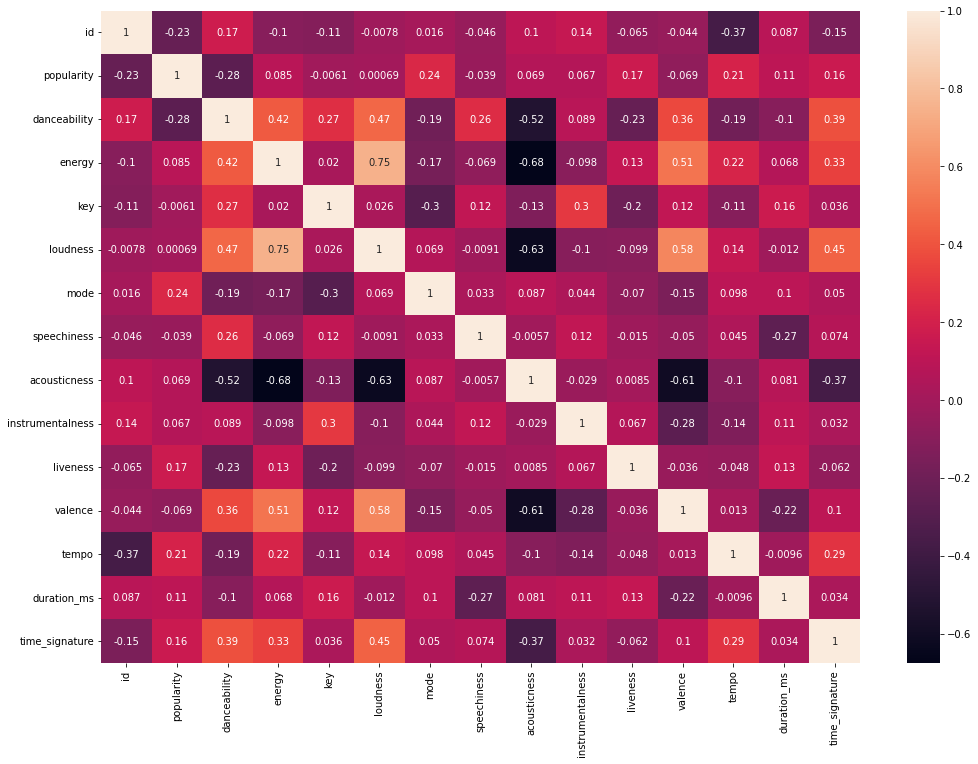

In [8]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
df.skew()

id                  0.000000
popularity         -1.390988
danceability       -0.717266
energy             -0.388784
key                 0.058259
loudness           -0.690274
mode               -0.509877
speechiness         2.023983
acousticness        0.929840
instrumentalness    4.685003
liveness            1.721014
valence            -0.135697
tempo               0.446869
duration_ms         0.414452
time_signature     -4.841323
dtype: float64

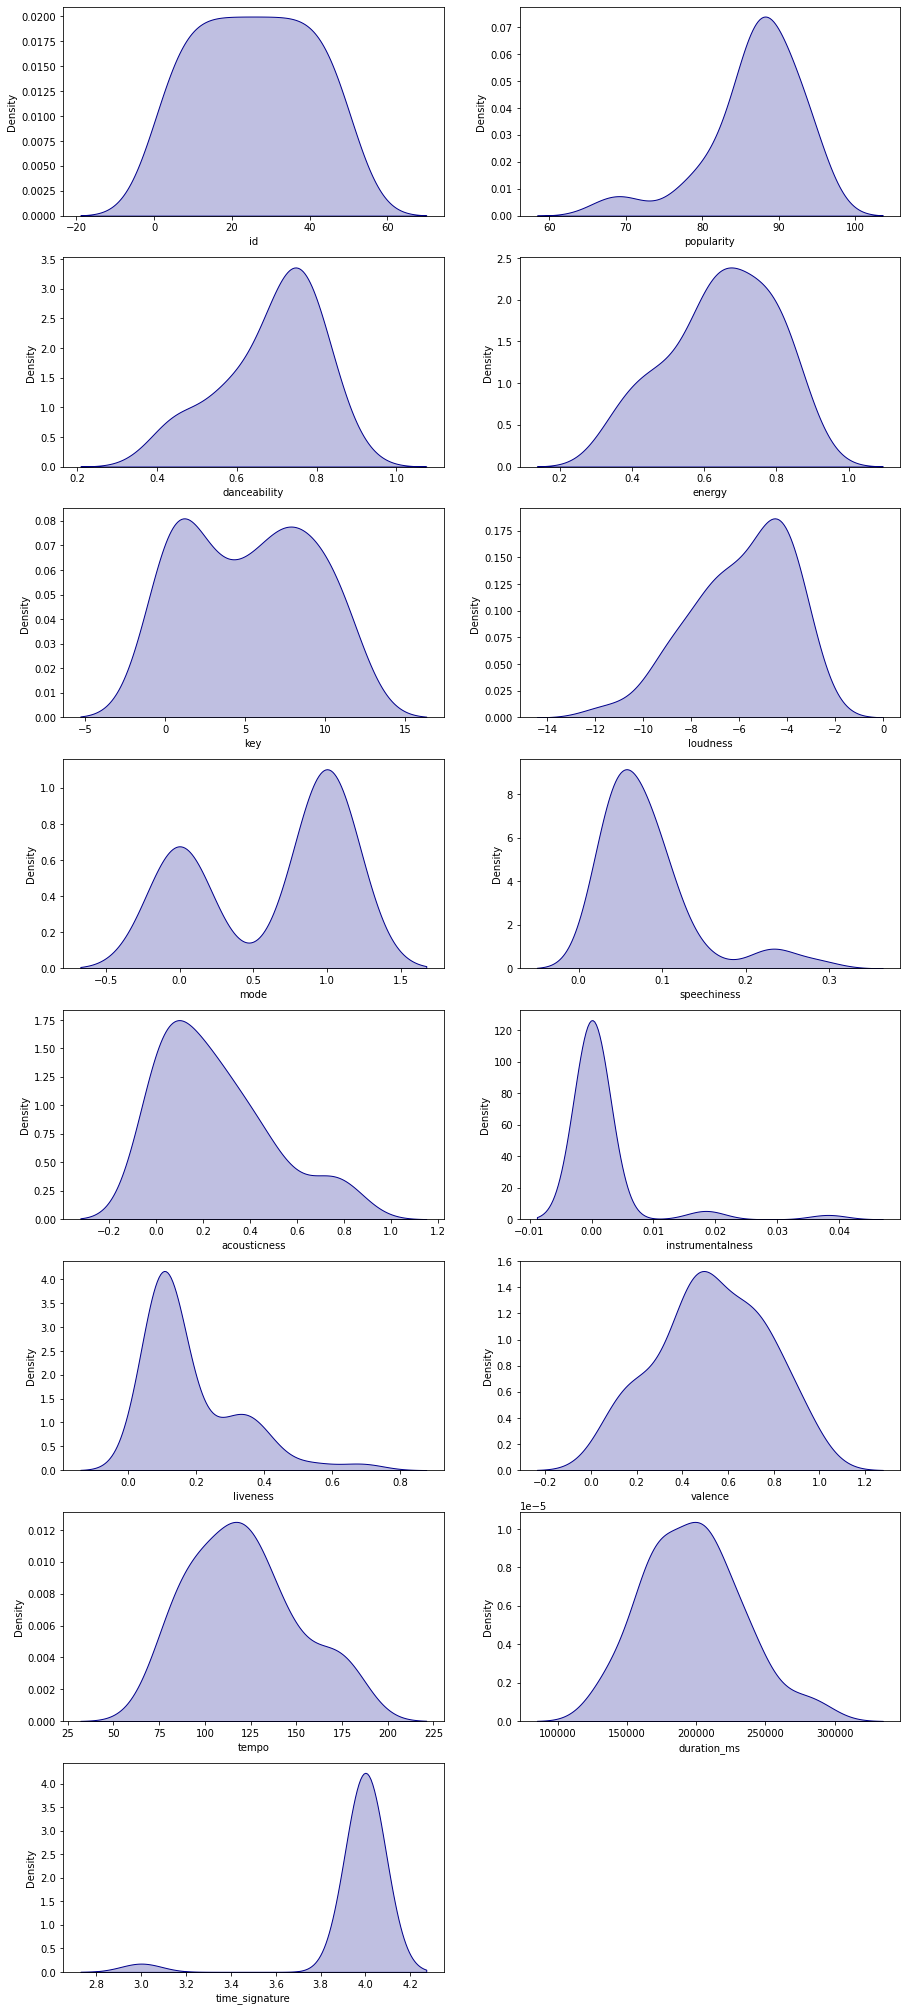

In [10]:
plt.figure(figsize=(15,50)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

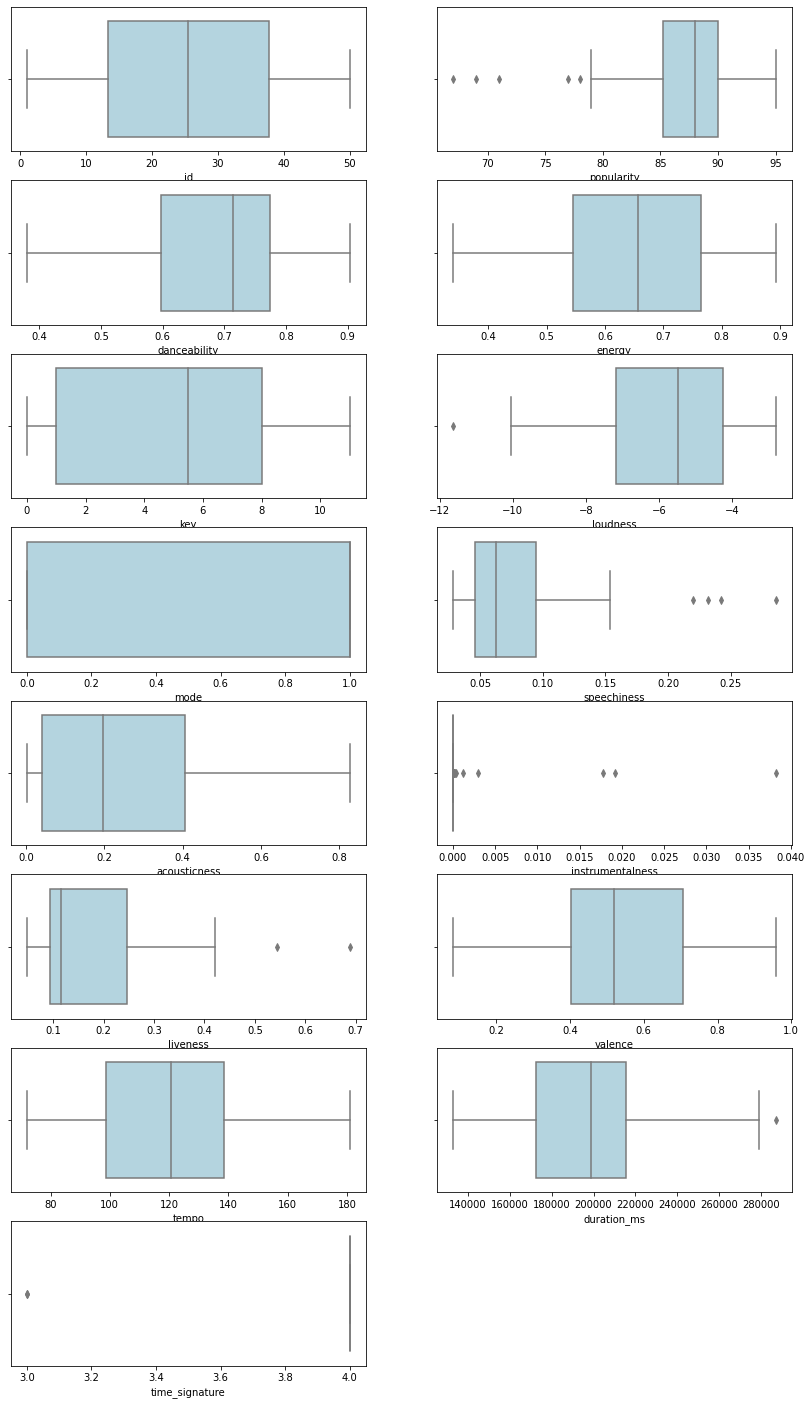

In [11]:
plt.figure(figsize=(14,25))
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(8,2,j)
    sns.boxplot(df[i],color='lightblue')
plt.show()

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
df.head()

,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.137,143.875,242013,4
2,3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806,4
3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147,4
4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4
5,6,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),4iJyoBOLtHqaGxP12qzhQI,90,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,198082,4


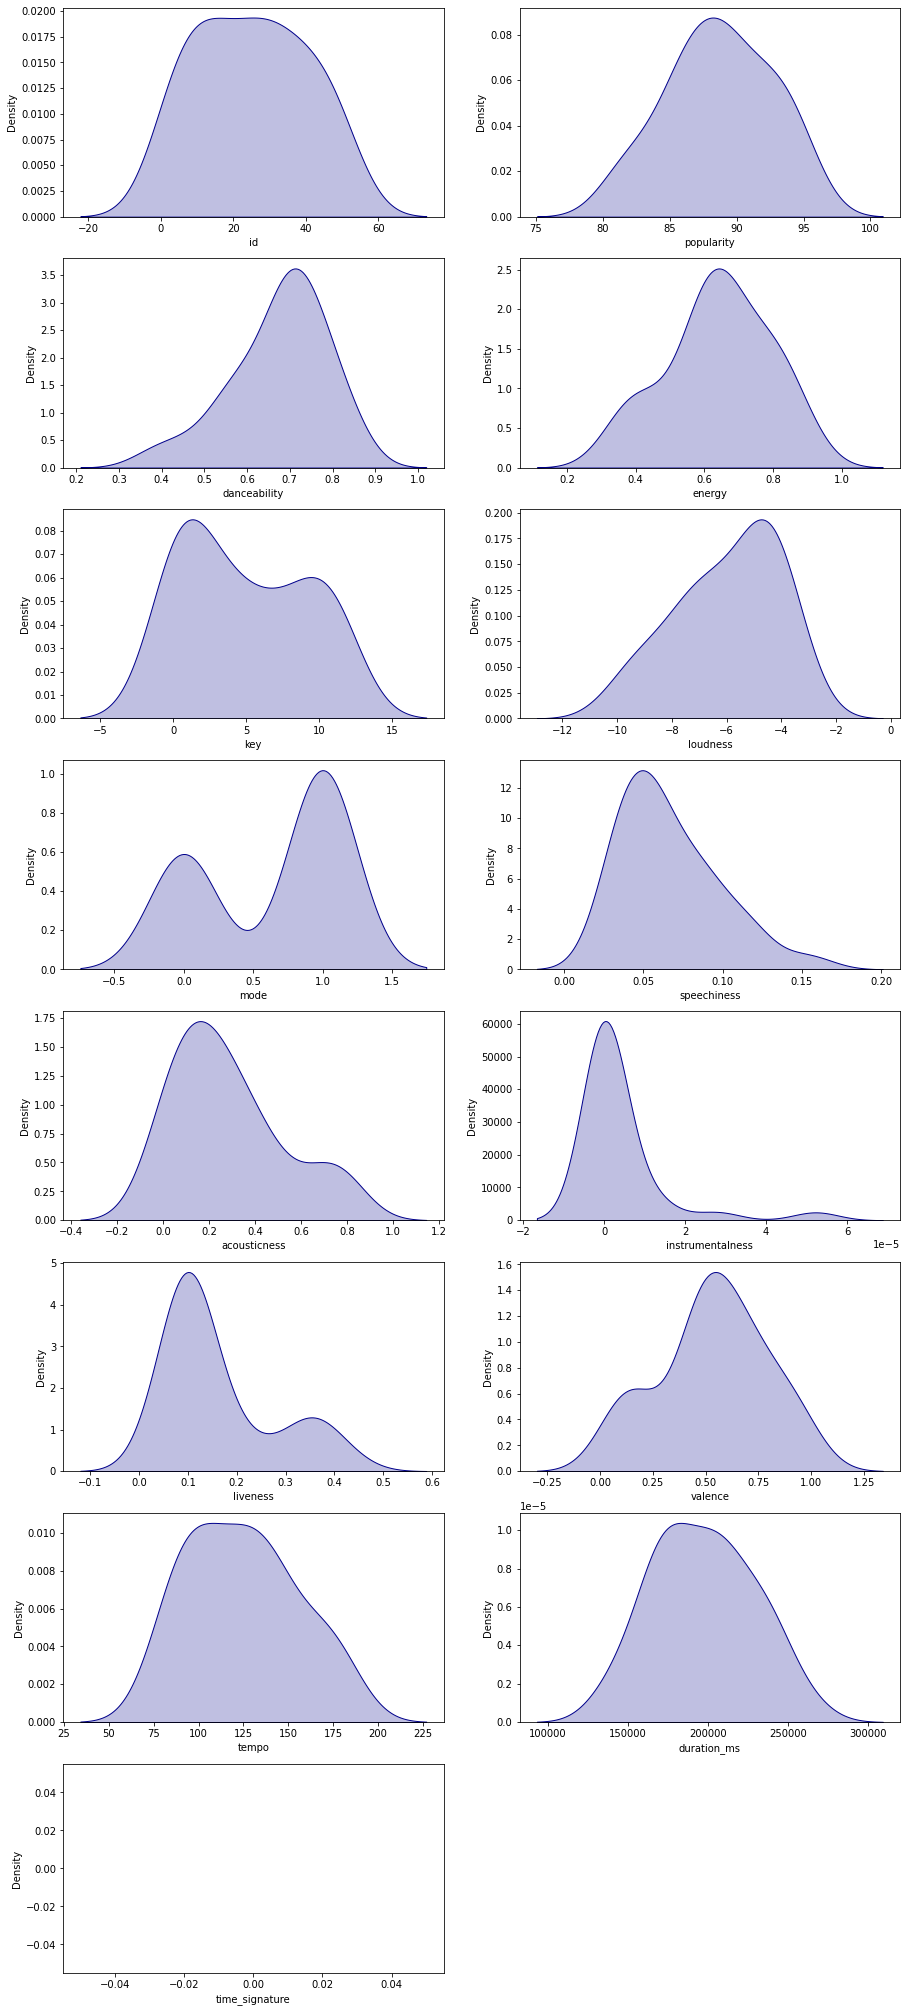

In [13]:
plt.figure(figsize=(15,50)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

In [14]:
df.skew()

id                  0.093438
popularity         -0.162323
danceability       -0.826365
energy             -0.311109
key                 0.284823
loudness           -0.546532
mode               -0.582933
speechiness         1.032372
acousticness        0.869535
instrumentalness    3.598703
liveness            1.237493
valence            -0.258110
tempo               0.320553
duration_ms         0.134072
time_signature      0.000000
dtype: float64

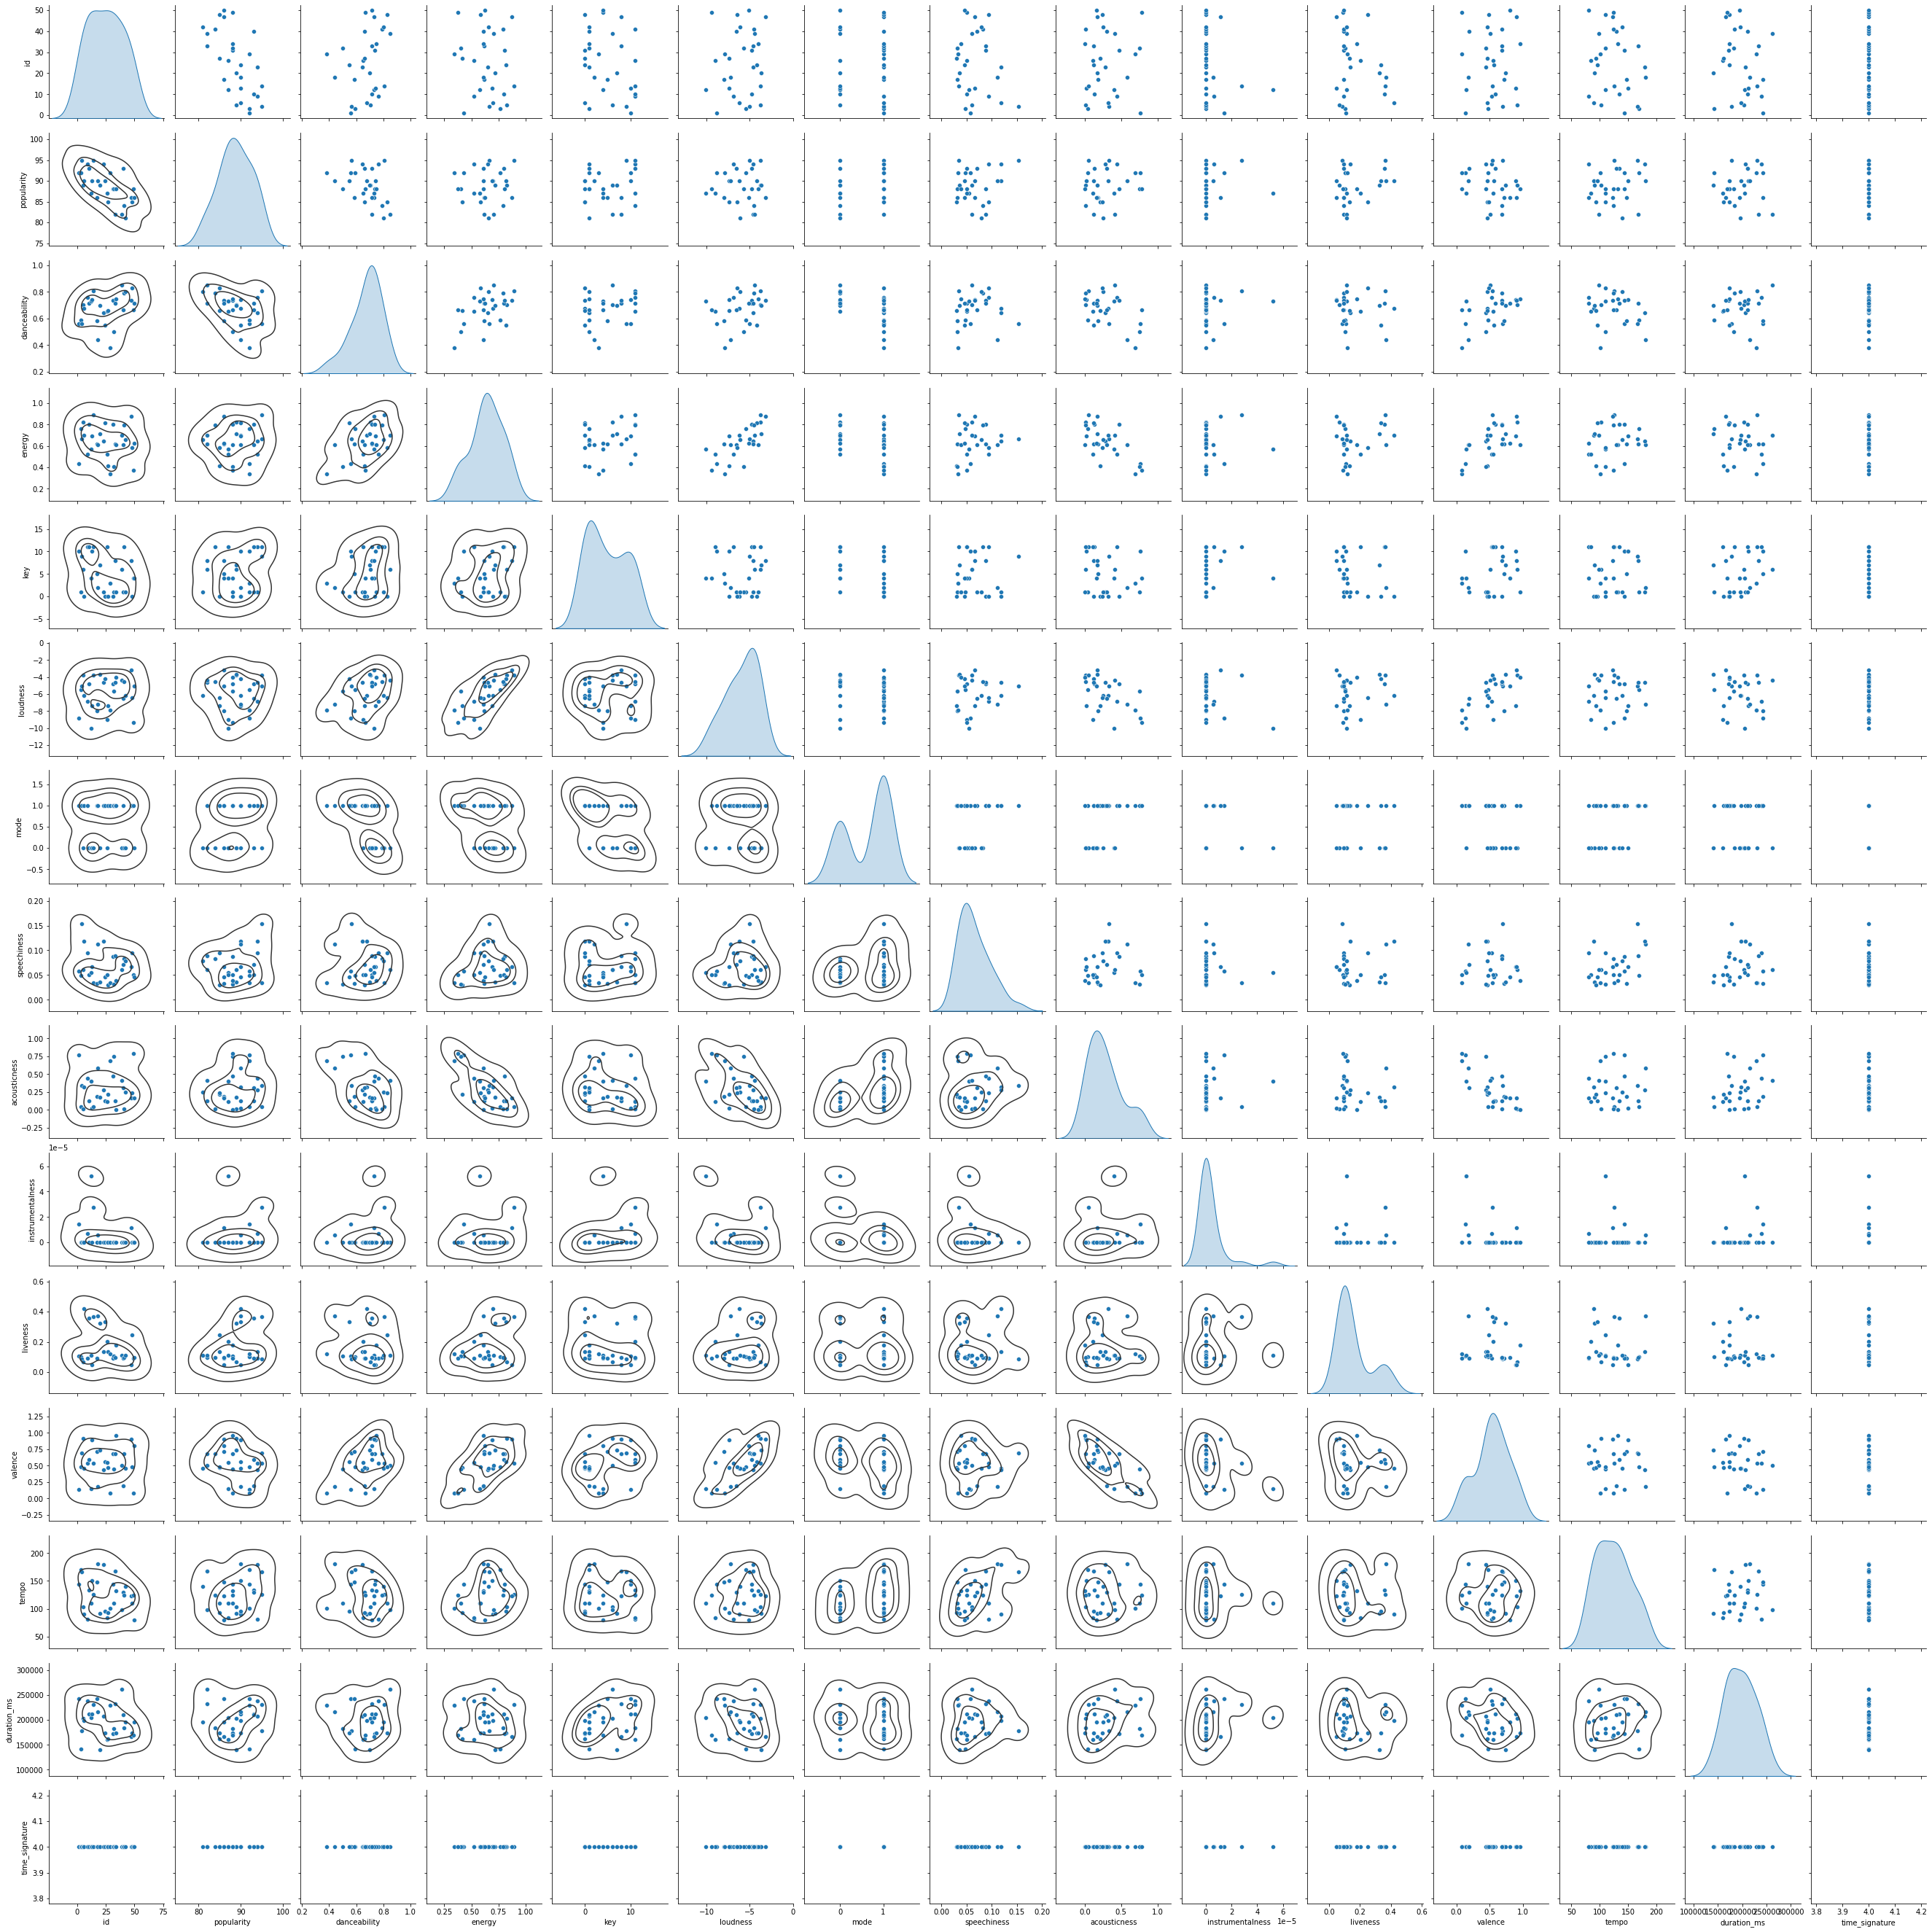

In [15]:
sns.pairplot(df, diag_kind="kde").map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

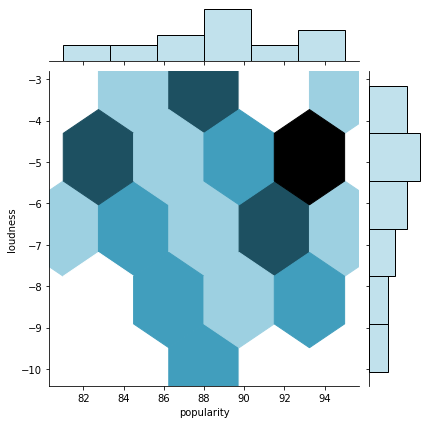

In [16]:
sns.jointplot(df.popularity,df.loudness,kind = 'hex',color='lightblue')
plt.show()

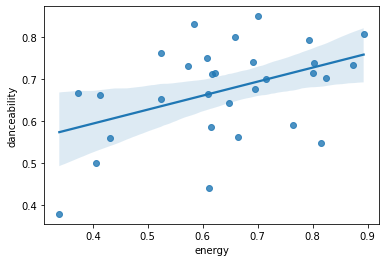

In [17]:
sns.regplot(x = 'energy',y = 'danceability',data=df)
plt.show()

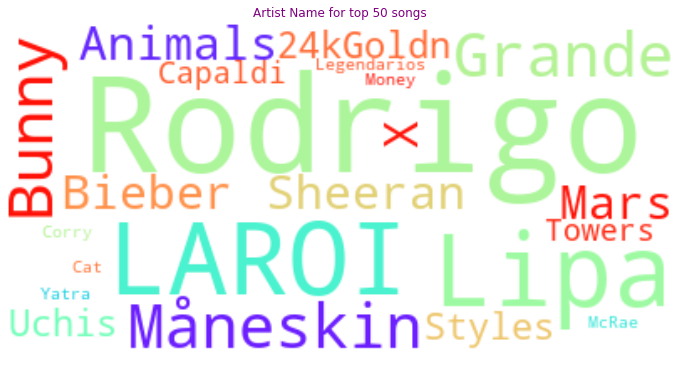

In [18]:
from wordcloud import WordCloud
text = " ".join(i.split()[-1] for i in df.artist_name)
word_cloud = WordCloud(collocations = False,colormap="rainbow", background_color = 'white').generate(text)
plt.figure(figsize=(12,18))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Artist Name for top 50 songs ",color='purple')
plt.show()